### HR Analytics Project- Understanding the Attrition in HR
#### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [392]:
## Importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [393]:
## Reading the dataset
data=pd.read_csv('HR-Employee-Attrition.csv')
## Saving a copy of the original dataset
data_copy=data

In [394]:
pd.set_option('max_columns', None)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [395]:
data.shape

(1470, 35)

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [397]:
print('columns with object data: ',data.select_dtypes(include='object').columns)

columns with object data:  Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


- **We have 34 features and 1470 observations.**
- **'Attrition' is our target and has object data.**
- **Features with object data:**
 - 'BusinessTravel', 
 - 'Department', 
 - 'EducationField', 
 - 'Gender', 
 - 'JobRole', 
 - 'MaritalStatus', 
 - 'Over18', 
 - 'OverTime'
- **We don't have any missing values in this dataset.**

In [398]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- **This further confirms that there are no missing values in this dataset**

In [399]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [400]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [401]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

- **Based on the above analysis we will drop 'EmployeeCount', 'Over18', 'StandardHours' as they have only single value throughout.**
- **We will also drop 'EmployeeNumber' as it just holds ID numbers of the employee.**

In [402]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [403]:
data.shape

(1470, 31)

**Now we have 30 Features and a Target**

In [404]:
## Seperating the continuous variables for analysis purpose
cont_var=data[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
cont_var.shape

(1470, 14)

In [405]:
## Seperating the catagorical variables for analysis purpose
cat_var=data[['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]
cat_var.shape

(1470, 16)

# EDA

In [406]:
## Checking Statistical Summerry of continuous variables
cont_var.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


**Skewness is observed in:**
- 'DistanceFromHome'
- 'MonthlyIncome'
- 'NumCompaniesWorked'
- 'PercentSalaryHike'
- 'TotalWorkingYears'
- 'TrainingTimesLastYear'
- 'YearsAtCompany'
- 'YearsInCurrentRole'
- 'YearsSinceLastPromotion'
- 'YearsWithCurrManager' 

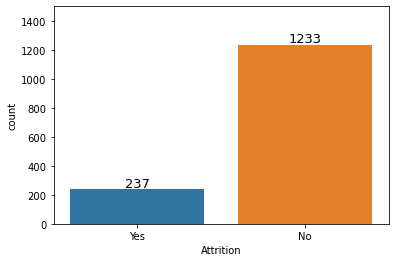

In [407]:
plt.ylim(0,1500)
ax=sns.countplot(data['Attrition'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+190), ha='center', va='top', color='black', size=13)
plt.show()

- Total of 237 employees have churned, which is about **16%** of the total employee count.
- Total of 1233 employees have remain in the company, which is about **84%** of the total employee count.
- **Target can be considered as imbalanced.**

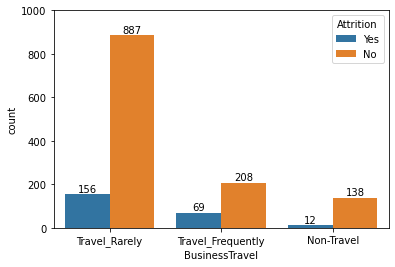

In [408]:

plt.ylim(0,1000)
ax=sns.countplot(data['BusinessTravel'], hue=data['Attrition'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

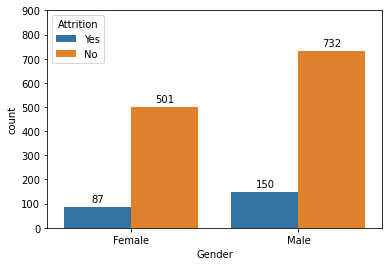

In [409]:
plt.ylim(0,900)
ax=sns.countplot(data['Gender'], hue=data['Attrition'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

- More number of Male employees churn compared to Female employees.

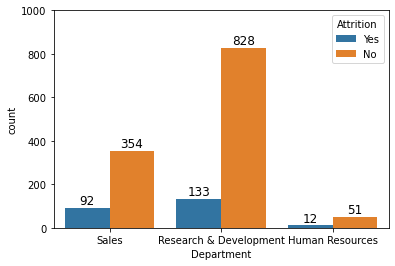

In [410]:
plt.ylim(0,1000)
ax=sns.countplot(data['Department'], hue=data['Attrition'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+130), ha='center', va='top', color='black', size=12)
plt.show()

- Employees working in 'Research & Development Department' churn more followed by 'Sales' and 'Human Resources' respectively

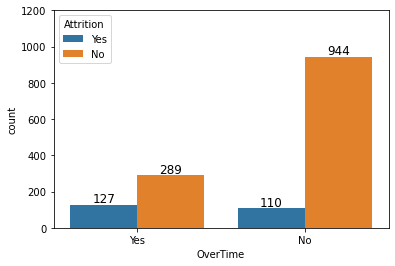

In [411]:
plt.ylim(0,1200)
ax=sns.countplot(data['OverTime'],hue=data['Attrition'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+150), ha='center', va='top', color='black', size=12)
plt.show()

- 'OverTime' seems as a trigger for employee churn as nearly 30% of the eployees who work overtime are churning.

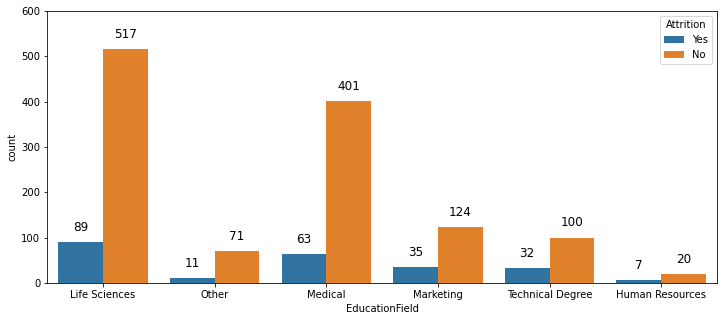

In [412]:
plt.figure(figsize=(12,5))
plt.ylim(0,600)
ax=sns.countplot(data['EducationField'],hue=data['Attrition'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+80), ha='center', va='top', color='black', size=12)
plt.show()

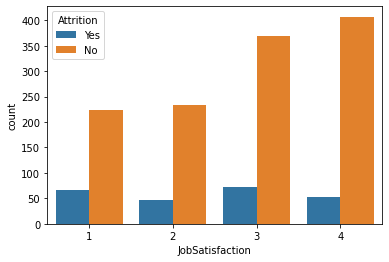

In [250]:
ax=sns.countplot(data['JobSatisfaction'],hue=data['Attrition'])

- **Employees with very low job satisfaction rating tend to churn more**

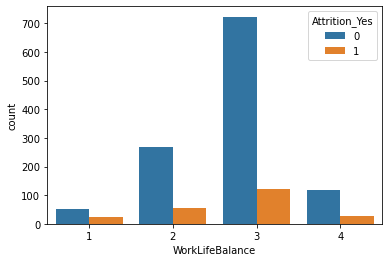

In [305]:
ax=sns.countplot(data['WorkLifeBalance'],hue=data['Attrition_Yes'])

### Encoding the object type data in numeric type

#### Applying Ordinal Encoding To 'BusinessTravel'

In [413]:
from sklearn.preprocessing import OrdinalEncoder

In [414]:
oe1=OrdinalEncoder(categories=[['Non-Travel','Travel_Rarely','Travel_Frequently']])
BizTravel=oe1.fit_transform(data[['BusinessTravel']])

In [415]:
data['BusinessTravel']=BizTravel

In [416]:
data['BusinessTravel'].value_counts()

1.0    1043
2.0     277
0.0     150
Name: BusinessTravel, dtype: int64

#### Applying Label Encoding to 'Department', 'EducationField', 'JobRole'

In [417]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

a=['Department','EducationField','JobRole']

for i in a:
    data[i]=le.fit_transform(data[i])

In [418]:
data=pd.get_dummies(data,drop_first=True)

In [419]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1.0,1102,2,1,2,1,2,94,3,2,7,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,0,1,1
1,49,2.0,279,1,8,1,1,3,61,2,2,6,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,1,0,0
2,37,1.0,1373,1,2,2,4,4,92,2,1,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,1,0,1,1
3,33,2.0,1392,1,3,4,1,4,56,3,1,6,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,0,1,0,1
4,27,1.0,591,1,2,1,3,1,40,3,1,2,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0


In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   float64
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   int32  
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   int32  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   HourlyRate                1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   int32  
 12  JobSatisfaction           1470 non-null   int64  
 13  MonthlyIncome             1470 non-null   int64  
 14  MonthlyR

**Now we have all the data in numeric form**

In [421]:
## Seperating continuous features for analysis purpose
cont_feat=data[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
cont_feat.shape

(1470, 14)

## Checking outliers and skewness in continuous variables

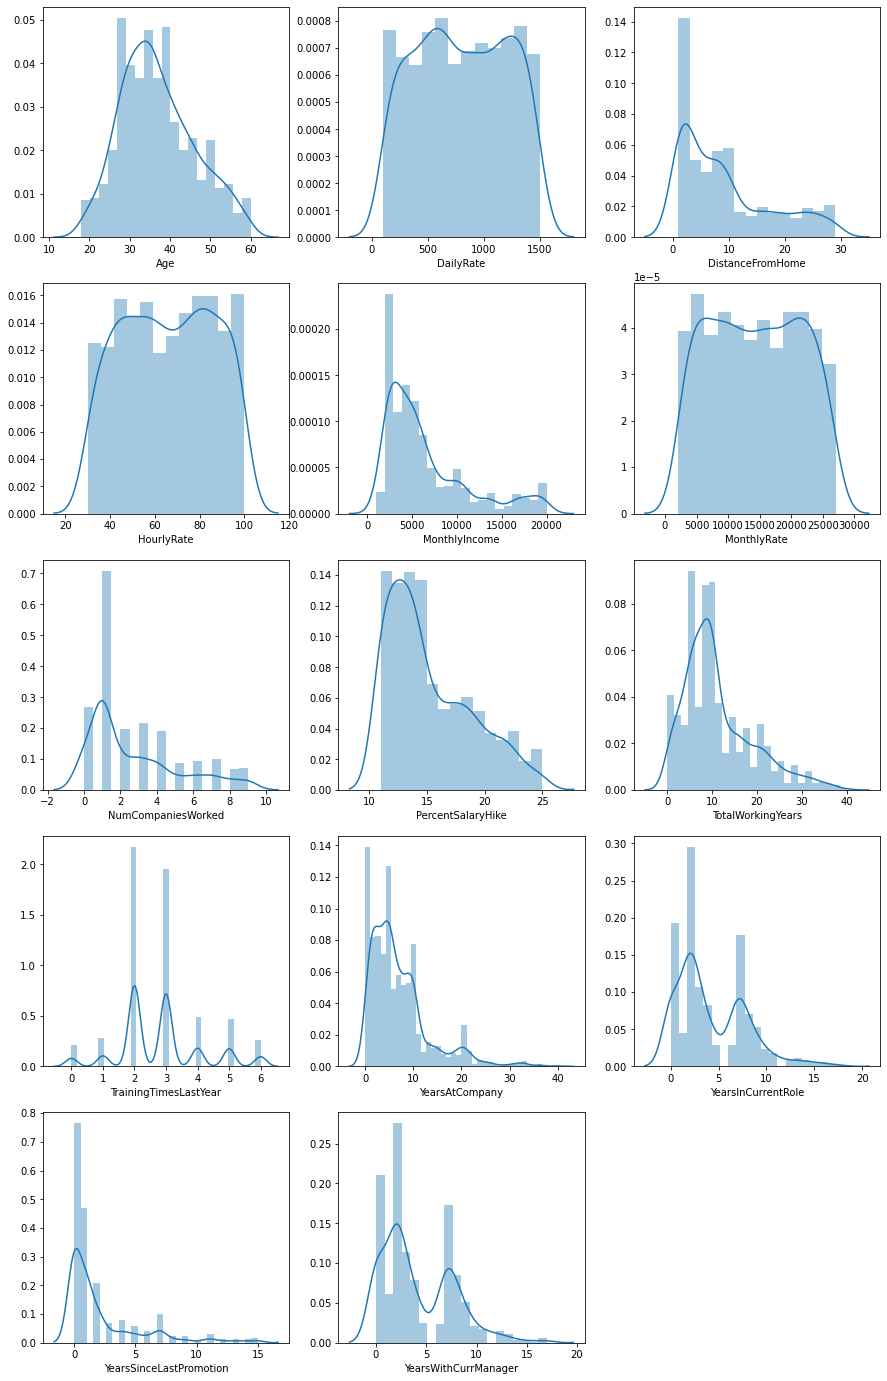

In [422]:
plt.figure(figsize=(15,50))
plotnumber=1

parameters = {'ytick.labelsize': 10,
          'xtick.labelsize': 10}
plt.rcParams.update(parameters)

for column in cont_feat:
    if plotnumber<=15:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(cont_feat[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

In [423]:
cont_feat.skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

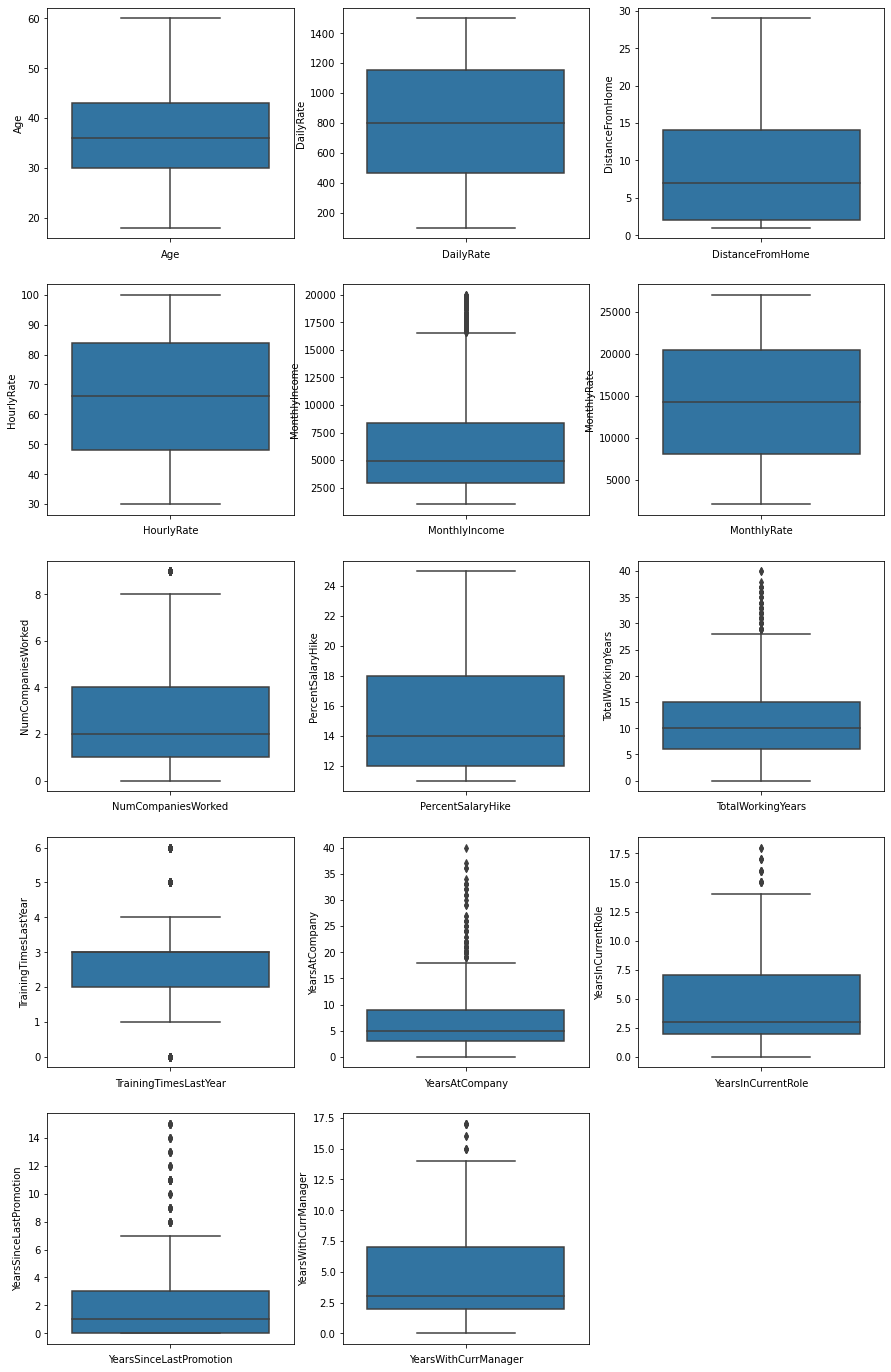

In [424]:
plt.figure(figsize=(15,50))
plotnumber=1

parameters = {'ytick.labelsize': 10,
          'xtick.labelsize': 10}
plt.rcParams.update(parameters)

for column in cont_feat:
    if plotnumber<=15:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(cont_feat[column],orient='v')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

### Skewness observed in:

- DistanceFromHome 
- MonthlyIncome  
- NumCompaniesWorked 
- PercentSalaryHike  
- TotalWorkingYears     
- TrainingTimesLastYear     
- YearsAtCompany             
- YearsInCurrentRole         
- YearsSinceLastPromotion
- YearsWithCurrManager      

## Outliers are observed in:
- MonthlyIncome  
- NumCompaniesWorked
- TotalWorkingYears     
- TrainingTimesLastYear
- YearsAtCompany             
- YearsInCurrentRole         
- YearsSinceLastPromotion
- YearsWithCurrManager

In [425]:
# rejecting data beyond 3 std to manage skewness and outliers
from scipy.stats import zscore

z_score=zscore(data[['MonthlyIncome','NumCompaniesWorked','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
                    'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

data.shape

(1387, 32)

**We are losing approximately 5.6% data which is fine**

In [426]:
cont_feat=data[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [427]:
cont_feat.skew()

Age                        0.472280
DailyRate                 -0.017078
DistanceFromHome           0.954752
HourlyRate                -0.030481
MonthlyIncome              1.544770
MonthlyRate                0.030596
NumCompaniesWorked         1.037715
PercentSalaryHike          0.800592
TotalWorkingYears          1.034487
TrainingTimesLastYear      0.577614
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

**Applying Log Tranformation to reduce skewness in above features**

In [428]:
for i in data[['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
                    'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]:
    if data[i].skew()>0.5:
        data[i]=np.log1p(data[i])

In [429]:
data[['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
                    'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].skew()

DistanceFromHome          -0.031570
MonthlyIncome              0.318873
NumCompaniesWorked         0.101288
PercentSalaryHike          0.496106
TotalWorkingYears         -0.728348
TrainingTimesLastYear     -1.044321
YearsAtCompany            -0.379527
YearsInCurrentRole        -0.390406
YearsSinceLastPromotion    0.695348
YearsWithCurrManager      -0.347018
dtype: float64

In [430]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1.0,1102,2,0.693147,2,1,2,94,3,2,7,4,8.698514,19479,2.197225,2.484907,3,1,0,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759,1,0,0,1,1
1,49,2.0,279,1,2.197225,1,1,3,61,2,2,6,2,8.543056,24907,0.693147,3.178054,4,4,1,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442,0,1,1,0,0
2,37,1.0,1373,1,1.098612,2,4,4,92,2,1,2,3,7.645398,2396,1.945910,2.772589,3,2,0,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000,1,1,0,1,1
3,33,2.0,1392,1,1.386294,4,1,4,56,3,1,6,3,7.975908,23159,0.693147,2.484907,3,3,0,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000,0,0,1,0,1
4,27,1.0,591,1,1.098612,1,3,1,40,3,1,2,2,8.151622,16632,2.302585,2.564949,3,4,1,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612,0,1,1,0,0


## Feature Selection

#### Checking the Relationship between continuous features and label

In [431]:
cont_feat=data[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
cont_feat.shape

(1387, 14)

In [432]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [433]:
selectbest=SelectKBest(score_func=f_classif,k=14)
selectbest.fit(cont_feat,data['Attrition_Yes'])

SelectKBest(k=14)

In [434]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(cont_feat.columns)

In [435]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(14,'Scores')

,Features,Scores
8,TotalWorkingYears,82.730556
10,YearsAtCompany,63.293054
4,MonthlyIncome,57.477729
13,YearsWithCurrManager,54.274528
11,YearsInCurrentRole,52.254144
0,Age,36.092149
2,DistanceFromHome,9.102916
9,TrainingTimesLastYear,5.304576
1,DailyRate,4.549637
6,NumCompaniesWorked,3.147868


**Will dropp 'MonthlyRate', 'PercentSalaryHike' and 'HourlyRate' as they have very low scores**

#### Checking the Relationship between catagorical features and label

In [436]:
cat_feat=data[['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender_Male','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus_Married','MaritalStatus_Single','OverTime_Yes','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]
cat_feat.shape

(1387, 17)

In [437]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [438]:
selectbest=SelectKBest(score_func=chi2,k=17)
selectbest.fit(cat_feat,data['Attrition_Yes'])

SelectKBest(k=17, score_func=<function chi2 at 0x000002587D76B790>)

In [439]:
scores1_df=pd.DataFrame(selectbest.scores_)
column1_df=pd.DataFrame(cat_feat.columns)

In [440]:
catfeature_scores=pd.concat([column1_df,scores1_df],axis=1) # Concating two DFs
catfeature_scores.columns=['Features','Scores'] # Naming the columns
catfeature_scores.nlargest(17,'Scores')

,Features,Scores
12,OverTime_Yes,65.641342
11,MaritalStatus_Single,30.285452
15,StockOptionLevel,23.873727
7,JobLevel,21.624943
9,JobSatisfaction,7.994182
8,JobRole,7.828838
10,MaritalStatus_Married,7.714632
4,EnvironmentSatisfaction,7.640280
0,BusinessTravel,5.960344
6,JobInvolvement,4.577980


**Will dropp 'PerformanceRating', 'Education', 'EducationField' and 'Gender_Male' as they have very low scores**

In [442]:
data.drop(['MonthlyRate', 'PercentSalaryHike', 'HourlyRate','PerformanceRating', 'Education', 'EducationField', 'Gender_Male' ],axis=1, inplace=True)
data.shape

(1387, 25)

### Seperating features and label

In [443]:
X=data.drop('Attrition_Yes',axis=1)
y=data['Attrition_Yes']

### Balancing the dataset using SMOTE

In [444]:
from imblearn.over_sampling import SMOTE

In [445]:
smote=SMOTE(sampling_strategy='minority')

In [446]:
X_sm,y_sm=smote.fit_sample(X,y)

In [447]:
print(y_sm.value_counts())

1    1158
0    1158
Name: Attrition_Yes, dtype: int64


### Scaling the features data

In [448]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [449]:
X_scaled=scaler.fit_transform(X_sm)

### Splitting the data into training and testing sets

In [450]:
from sklearn.model_selection import train_test_split

In [451]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_sm,test_size=0.25,random_state=40)

### Importing classification performance metrics

In [452]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.model_selection import cross_val_score

### Model 1: Logistic Regression

In [453]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [454]:
lr.fit(X_train,y_train)

LogisticRegression()

In [455]:
y_lr=lr.predict(X_test)

In [456]:
lr_score=accuracy_score(y_test,y_lr)
lr_score

0.8514680483592401

In [457]:
lr_cvs=cross_val_score(lr,X_scaled,y_sm,cv=5).mean()
lr_cvs

0.8459270499739331

In [458]:
print(confusion_matrix(y_test,y_lr))

[[238  36]
 [ 50 255]]


In [460]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       274
           1       0.88      0.84      0.86       305

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579



### Model 2: SVC

In [461]:
from sklearn.svm import SVC
svc=SVC()

In [462]:
svc.fit(X_train,y_train)

SVC()

In [463]:
y_svc=svc.predict(X_test)

In [464]:
svc_score=accuracy_score(y_test,y_svc)
svc_score

0.8842832469775475

In [465]:
svc_cvs=cross_val_score(svc,X_scaled,y_sm,cv=5).mean()
svc_cvs

0.8822102852461459

In [466]:
print(confusion_matrix(y_test,y_svc))

[[252  22]
 [ 45 260]]


In [467]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       274
           1       0.92      0.85      0.89       305

    accuracy                           0.88       579
   macro avg       0.89      0.89      0.88       579
weighted avg       0.89      0.88      0.88       579



### Model 4: Decision Tree

In [468]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [469]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [470]:
y_dt=dt.predict(X_test)

In [471]:
dt_score=accuracy_score(y_test,y_dt)
dt_score

0.8290155440414507

In [472]:
dt_cvs=cross_val_score(dt,X_scaled,y_sm,cv=5).mean()
dt_cvs

0.825199225441275

In [473]:
print(confusion_matrix(y_test,y_dt))

[[224  50]
 [ 49 256]]


In [474]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       274
           1       0.84      0.84      0.84       305

    accuracy                           0.83       579
   macro avg       0.83      0.83      0.83       579
weighted avg       0.83      0.83      0.83       579



### Model 4: Random Forest

In [501]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [502]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [503]:
y_rf=rf.predict(X_test)

In [504]:
rf_score=accuracy_score(y_test,y_rf)
rf_score

0.9032815198618307

In [505]:
rf_cvs=cross_val_score(rf,X_scaled,y_sm,cv=5).mean()
rf_cvs

0.8982088329485366

In [506]:
print(confusion_matrix(y_test,y_rf))

[[261  13]
 [ 43 262]]


In [507]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       274
           1       0.95      0.86      0.90       305

    accuracy                           0.90       579
   macro avg       0.91      0.91      0.90       579
weighted avg       0.91      0.90      0.90       579



### Model 5: Knn

In [508]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [509]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [510]:
y_knn=knn.predict(X_test)

In [511]:
knn_score=accuracy_score(y_test,y_knn)
knn_score

0.8756476683937824

In [512]:
knn_cvs=cross_val_score(knn,X_scaled,y_sm,cv=5).mean()
knn_cvs

0.8700482237283087

In [513]:
print(confusion_matrix(y_test,y_knn))

[[214  60]
 [ 12 293]]


In [514]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       274
           1       0.83      0.96      0.89       305

    accuracy                           0.88       579
   macro avg       0.89      0.87      0.87       579
weighted avg       0.89      0.88      0.87       579



## Plotting the roc_auc curve

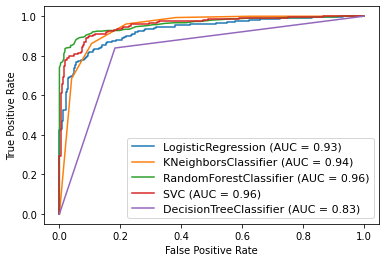

In [515]:
disp=plot_roc_curve(lr,X_test,y_test)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

In [516]:
print('rf',rf_cvs)
print('svc',svc_cvs)

rf 0.8982088329485366
svc 0.8822102852461459


**Based on the AUC and Cross Validation Scores, Random Forest Classifier is our best model**

## Tuning the hyperparameters of the best model

In [491]:
from sklearn.model_selection import GridSearchCV

In [492]:
rf_grid={'criterion':['gini','entropy'],
         'min_samples_split':[2,4,6],
         'min_samples_leaf':[1,2,5],
         'n_estimators':[80,100,120]}

In [493]:
gridCV=GridSearchCV(rf,param_grid=rf_grid,n_jobs=-1)

In [494]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [80, 100, 120]})

In [495]:
gridCV.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [517]:
rf_best=RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=2,n_estimators=100)

In [518]:
rf_best.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [519]:
y_best=rf_best.predict(X_test)

In [520]:
best_score=accuracy_score(y_test,y_best)
best_score

0.8998272884283247

In [521]:
best_cvs=cross_val_score(rf_best,X_scaled,y_sm,cv=5).mean()
best_cvs

0.9020937290533999

In [522]:
print(confusion_matrix(y_test,y_best))

[[259  15]
 [ 43 262]]


In [523]:
print(classification_report(y_test,y_best))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       274
           1       0.95      0.86      0.90       305

    accuracy                           0.90       579
   macro avg       0.90      0.90      0.90       579
weighted avg       0.90      0.90      0.90       579



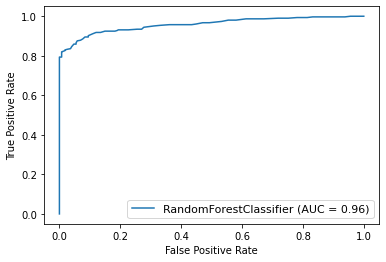

In [524]:
disp=plot_roc_curve(rf_best,X_test,y_test)

plt.legend(prop={'size':11},loc='lower right')

## Saving the best model

In [525]:
import pickle
filename='HR_Analytics_RF.pkl'
pickle.dump(rf_best,open(filename,'wb'))